# Working with data in Pandas
## Afnan Alqahtani and Alexis Ford
### Cleaning the data
We began by importing the data set and parsing the dates so they were easier to read. Then we created a smaller data frame with only the columns of interest (station name, date, rainfall, min/max temp) and removed the data with missing values (values of -9999) to ensure we were working with meaningful data. Since the temperatures and rainfall were in 10th of a unit, we also divided those columns by 10. From there, we determined the number of observations in each station; we chose the station with the most observations, Mount Shasta, and turned those observations into a separate data frame. Lastly, we created one more smaller data frame that contains only the observations in June.

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("GHCN.csv", parse_dates=[2])
dfSmall = pd.DataFrame({'station' : df['STATION_NAME'], 'date' : df['DATE'], 'rain' : df['PRCP'], 'tempMax' : df['TMAX'], 'tempMin' : df['TMIN']})
dfSmall = dfSmall[~((dfSmall.rain == -9999) | (dfSmall.tempMax == -9999) | (dfSmall.tempMin == -9999))] #remove observations with missing data
dfSmall['tempMax'] = dfSmall['tempMax']/10.0
dfSmall['tempMin'] = dfSmall['tempMin']/10.0
dfSmall['rain'] = dfSmall['rain']/10.0

In [85]:
#find number of observations for each station
(dfSmall['station'].value_counts()).head()

MOUNT SHASTA CA US             1209
ORLAND CA US                    610
STONY GORGE RESERVOIR CA US     610
TWENTYNINE PALMS 12 E CA US     610
MORONGO VALLEY NORTH CA US      610
Name: station, dtype: int64

In [74]:
dfMtShasta = dfSmall[dfSmall.station == 'MOUNT SHASTA CA US']
dfMtShastaJune = dfMtShasta[(dfMtShasta.date >= pd.Timestamp('2015-06-01')) & (dfMtShasta.date <= pd.Timestamp('2015-06-30'))]

### Plotting the Data
Upon plotting the data for temperature highs and lows, we see a predictable pattern of high temperatures during summer months and low temperatures in the winter months, though January 2015 appears to be a particularly warm winter month. As would also be expected, there was not much rain in July of 2015, though the plot of rainfall over the entire time period shows March of 2015 had a particularly high rainfall.

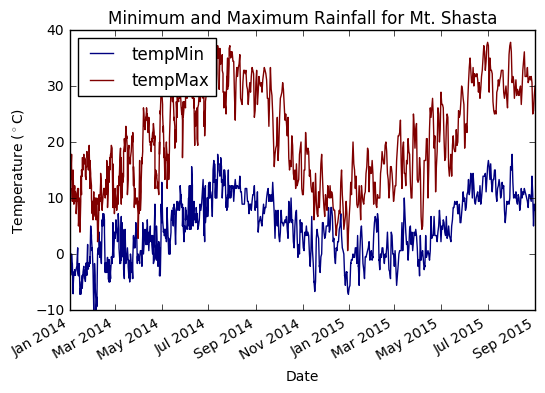

In [84]:
%matplotlib inline
tempPlot = dfMtShasta.plot(x='date',y=['tempMin','tempMax'], title='Minimum and Maximum Rainfall for Mt. Shasta',colormap='jet')
tempPlot.set_ylabel(r'Temperature ($^\circ$C)')
tempPlot.set_xlabel('Date')
tempPlot

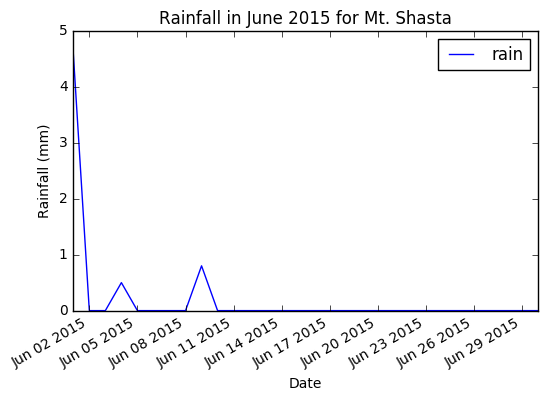

In [81]:
%matplotlib inline
rainPlot = dfMtShastaJune.plot(x='date',y='rain', title='Rainfall in June 2015 for Mt. Shasta')
rainPlot.set_ylabel('Rainfall (mm)')
rainPlot.set_xlabel('Date')
rainPlot

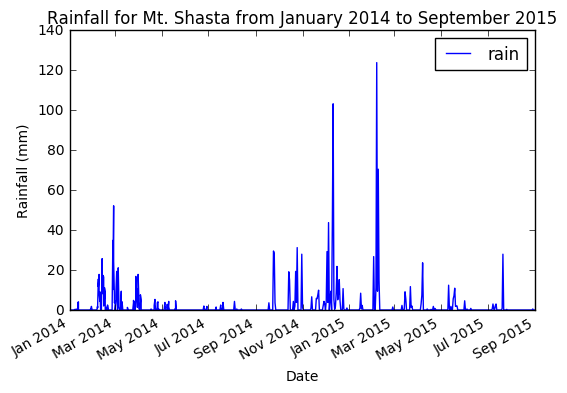

In [86]:
totalRainPlot = dfMtShasta.plot(x='date',y='rain', title='Rainfall for Mt. Shasta from January 2014 to September 2015')
totalRainPlot.set_ylabel('Rainfall (mm)')
totalRainPlot.set_xlabel('Date')
